## SekaiViewer Tracker

In [1]:
import requests
from typing import Any, Dict, List, Optional, Tuple
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

BASE_URL = "https://api.sekai.best"
REGION = "jp"
EVENTS_JSON_URL = (
    "https://raw.githubusercontent.com/Sekai-World/sekai-master-db-diff/"
    "main/events.json"
)

In [3]:
def fetch_event_list():
    resp = requests.get(EVENTS_JSON_URL)
    resp.raise_for_status()
    data = resp.json()
    if not isinstance(data, list):
        raise ValueError("events.json の中身がリストではありません。")
    return data

In [4]:
def list_event_names(events):
    event_names = [e["name"] for e in events if isinstance(e, dict) and "name" in e]
    print("\n".join(event_names))

In [5]:
def get_event_info_by_name(event_name, events):
    for evt in events:
        if not isinstance(evt, dict):
            continue
        JST = timezone(timedelta(hours=9))
        if evt.get("name") == event_name:
            return evt.get("id"), datetime.fromtimestamp(evt.get("startAt") / 1000, tz=JST), datetime.fromtimestamp(evt.get("closedAt") / 1000, tz=JST)
    return None

In [6]:
events = fetch_event_list()

In [7]:
list_event_names(events)

雨上がりの一番星
囚われのマリオネット
全力！ワンダーハロウィン！
走れ！体育祭！～実行委員は大忙し～
ここからRE:START！
いつか、背中あわせのリリックを
KAMIKOU FESTIVAL！
聖なる夜に、この歌声を
セカイのハッピーニューイヤー！
揺れるまま、でも君は前へ
Color of Myself！
Period of NOCTURNE
響くトワイライトパレード
満たされないペイルカラー
スマイルオブドリーマー
天馬さんちのひな祭り
届け！HOPEFUL STAGE♪
君と歌う、桜舞う世界で
シークレット・ディスタンス
Resonate with you
STRAY BAD DOG
お悩み聞かせて！わくわくピクニック
頑張るあなたにBreak Time！
純白の貴方へ、誓いの歌を！
ワンダーマジカルショウタイム！
カーネーション・リコレクション
Unnamed Harmony
Awakening Beat
夏祭り、鳴り響く音は
きっと最高のsummer！
ハッピー・ラブリー・エブリデイ！
マーメイドにあこがれて
ふたり、月うさぎ
Knock the Future!!
灯のミラージュ
スクランブル・ファンフェスタ！
Bout for Beside You
Revival my dream
ボクのあしあと キミのゆくさき
揺るがぬ想い、今言葉にして
バディ・ファニー・スペンドタイム♪
交わる旋律 灯るぬくもり
MOREMOREMakingXmas
Same Dreams,Same Colors
祈りの先 願う明日は
POP IN MY HEART!!
いつか、絶望の底から
秘密の♡バレンタイン大作戦！
Legend still vivid
あの日、空は遠かった
怪盗紳士のハラハラ！？ホワイトデー
Cast Spell on You
空白のキャンバスに描く私は
セカイの桜、つながる想い
まばゆい光のステージで
Live with memories
つなぐPainful Hope
白熱！神高応援団！
THE POWER OF UNITY
青空に願うユア・ハピネス！
迷い子の手を引く、そのさきは
絶体絶命！？アイランドパニック！
みんなでエンジョイ！スポジョイパーク
The Vivid Old Tale
No seek No find
close game/OF

In [8]:
events[129]

{'id': 130,
 'eventType': 'world_bloom',
 'name': 'いつか花咲くステージへ',
 'assetbundleName': 'event_blooming_2024',
 'bgmAssetbundleName': 'event/event_blooming_2024/bgm/event_blooming_2024_top',
 'eventPointAssetbundleName': 'icon_point',
 'eventOnlyComponentDisplayStartAt': 1715223600000,
 'startAt': 1715252400000,
 'aggregateAt': 1716289199000,
 'rankingAnnounceAt': 1716289799000,
 'distributionStartAt': 1716343199000,
 'eventOnlyComponentDisplayEndAt': 1716433199000,
 'closedAt': 1716443999000,
 'distributionEndAt': 1717599599000,
 'virtualLiveId': 301,
 'unit': 'idol',
 'eventRankingRewardRanges': [{'id': 3745,
   'eventId': 130,
   'fromRank': 1,
   'toRank': 1,
   'isToRankBorder': False,
   'eventRankingRewards': [{'id': 3745,
     'eventRankingRewardRangeId': 3745,
     'resourceBoxId': 3745}]},
  {'id': 3746,
   'eventId': 130,
   'fromRank': 2,
   'toRank': 2,
   'isToRankBorder': False,
   'eventRankingRewards': [{'id': 3746,
     'eventRankingRewardRangeId': 3746,
     'resourceBo

In [9]:
def fetch_100rank_graph(event_id: int, rank: int):
    url = f"{BASE_URL}/event/{event_id}/rankings/graph"
    params = {
        "region": REGION,
        "rank": rank,
    }
    print("Requesting URL:", url)
    print("With params:", params)
    resp = requests.get(url, params=params)
    resp.raise_for_status()

    body = resp.json()
    graph_data = body.get("data", {}).get("eventRankings", [])
    return graph_data

In [23]:
def fetch_100rank_graph_chap(event_id: int, rank: int):
    url = f"{BASE_URL}/event/{event_id}/chapter_rankings/time"
    params = {
        "region": REGION,
        "rank": rank,
    }
    print("Requesting URL:", url)
    print("With params:", params)
    resp = requests.get(url, params=params)
    resp.raise_for_status()

    body = resp.json()
    graph_data = body.get("data", {}).get("eventRankings", [])
    return graph_data

In [24]:
get_event_info_by_name("泡沫に抱かれて", events)

(170,
 datetime.datetime(2025, 6, 9, 20, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=32400))),
 datetime.datetime(2025, 6, 23, 19, 59, 59, tzinfo=datetime.timezone(datetime.timedelta(seconds=32400))))

In [25]:
eid, start, end = get_event_info_by_name("泡沫に抱かれて", events)
graph = fetch_100rank_graph_chap(eid, 100)

Requesting URL: https://api.sekai.best/event/170/chapter_rankings/time
With params: {'region': 'jp', 'rank': 100}


HTTPError: 400 Client Error: Bad Request for url: https://api.sekai.best/event/170/chapter_rankings/time?region=jp&rank=100

In [16]:
graph

[{'id': 47178616,
  'eventId': 170,
  'timestamp': '2025-06-09T11:12:00.101Z',
  'rank': 100,
  'score': 572650,
  'userId': '5142422560796676',
  'userName': 'えなお',
  'userCard': {'level': 60,
   'cardId': 612,
   'masterRank': 5,
   'defaultImage': 'original',
   'specialTrainingStatus': 'done'},
  'userProfile': {'word': '天井許さない',
   'userId': '5142422560796676',
   'twitterId': 'MaSi_kaNa25',
   'profileImageType': 'leader'},
  'userCheerfulCarnival': {},
  'userProfileHonors': [{'seq': 1,
    'honorId': 1011702,
    'honorLevel': 10,
    'bondsHonorWordId': 1011701,
    'profileHonorType': 'bonds',
    'bondsHonorViewType': 'normal'},
   {'seq': 2,
    'honorId': 3452,
    'honorLevel': 1,
    'bondsHonorWordId': 0,
    'profileHonorType': 'normal',
    'bondsHonorViewType': 'none'},
   {'seq': 3,
    'honorId': 4654,
    'honorLevel': 1,
    'bondsHonorWordId': 0,
    'profileHonorType': 'normal',
    'bondsHonorViewType': 'none'}]},
 {'id': 47179310,
  'eventId': 170,
  'timesta

In [274]:
def create_df_border(data: List[Dict], start: datetime, end: datetime, offset: int = 0) -> pd.DataFrame:
    JST = timezone(timedelta(hours=9))
    df = pd.DataFrame(data)[["timestamp", "score"]]
    df["timestamp"] = pd.to_datetime(df["timestamp"].str.replace("Z", "+00:00"), utc=True)
    df["timestamp"] = df["timestamp"].dt.tz_convert(JST)
    df = df.sort_values("timestamp").reset_index(drop=True)
    df = df[df["timestamp"] >= start]
    df = df[df["timestamp"] <= end]
    df["score"] = df["score"] - offset
    df["elapsed_hours"] = (df["timestamp"] - start).dt.total_seconds() / 3600
    df["delta_times"] = df["timestamp"].diff().dt.total_seconds() / 3600
    df["delta_score"] = df["score"].diff()
    df["score_per_hour"] = df["delta_score"] / df["delta_times"]
    df.loc[df["delta_times"] == 0, "score_per_hour"] = None
    return df

In [275]:
df_border = create_df_border(graph, start, start + timedelta(days=3))

In [276]:
print(df_border)

                           timestamp      score  elapsed_hours  delta_times  \
0   2025-05-09 20:42:00.100000+09:00    1919240       0.700028          NaN   
1   2025-05-09 21:00:00.130000+09:00    2721915       1.000036     0.300008   
2   2025-05-09 21:30:00.123000+09:00    4098555       1.500034     0.499998   
3   2025-05-09 22:00:00.112000+09:00    5494145       2.000031     0.499997   
4   2025-05-09 22:30:00.157000+09:00    6897625       2.500044     0.500012   
..                               ...        ...            ...          ...   
136 2025-05-12 18:00:00.120000+09:00  165531660      70.000033     0.500006   
137 2025-05-12 18:30:00.120000+09:00  166938310      70.500033     0.500000   
138 2025-05-12 19:00:00.110000+09:00  168234064      71.000031     0.499997   
139 2025-05-12 19:00:00.110000+09:00  168337594      71.000031     0.000000   
140 2025-05-12 19:30:00.201000+09:00  169725008      71.500056     0.500025   

     delta_score  score_per_hour  
0            NaN

In [277]:
def plot_score_timeline(df: pd.DataFrame, start: datetime, end: datetime):
    total_hours = (end - start).total_seconds() / 3600
    plt.figure(figsize=(10, 5))
    plt.plot(df["elapsed_hours"], df["score"], linestyle='-', marker='.')
    plt.xlabel("Elapsed Time (hours)")
    plt.ylabel("Score")
    plt.title("Score Progression Over Time")
    plt.grid(True)
    plt.xlim(0, total_hours)
    plt.ylim(0, df["score"].max() * 1.05 if not df["score"].empty else 1)
    plt.tight_layout()
    plt.show()

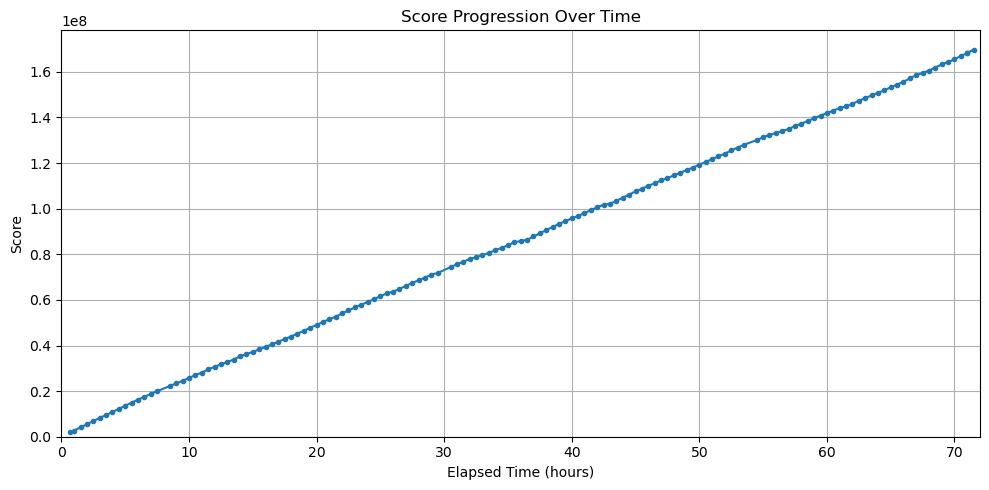

In [278]:
plot_score_timeline(df_border, start, start + timedelta(days=3))

In [156]:
eid, start, end = get_event_info_by_name("Dear my fellows", events)
graph = fetch_100rank_graph(eid, 100)

Requesting URL: https://api.sekai.best/event/167/rankings/graph
With params: {'region': 'jp', 'rank': 100}


In [157]:
df_border = create_df_border(graph, start, start + timedelta(days=3, minutes=1))

In [158]:
df_border

,timestamp,score,elapsed_hours,delta_times,delta_score,score_per_hour
0,2025-05-09 20:00:00+09:00,0,0.000000,NaN,NaN,NaN
1,2025-05-09 20:42:00.100000+09:00,1919240,0.700028,0.700028,1919240.0,2.741663e+06
2,2025-05-09 21:00:00.130000+09:00,2721915,1.000036,0.300008,802675.0,2.675509e+06
3,2025-05-09 21:30:00.123000+09:00,4098555,1.500034,0.499998,1376640.0,2.753291e+06
4,2025-05-09 22:00:00.112000+09:00,5494145,2.000031,0.499997,1395590.0,2.791197e+06
...,...,...,...,...,...,...
138,2025-05-12 18:30:00.120000+09:00,166938310,70.500033,0.500000,1406650.0,2.813300e+06
139,2025-05-12 19:00:00.110000+09:00,168234064,71.000031,0.499997,1295754.0,2.591522e+06
140,2025-05-12 19:00:00.110000+09:00,168337594,71.000031,0.000000,103530.0,NaN
141,2025-05-12 19:30:00.201000+09:00,169725008,71.500056,0.500025,1387414.0,2.774688e+06


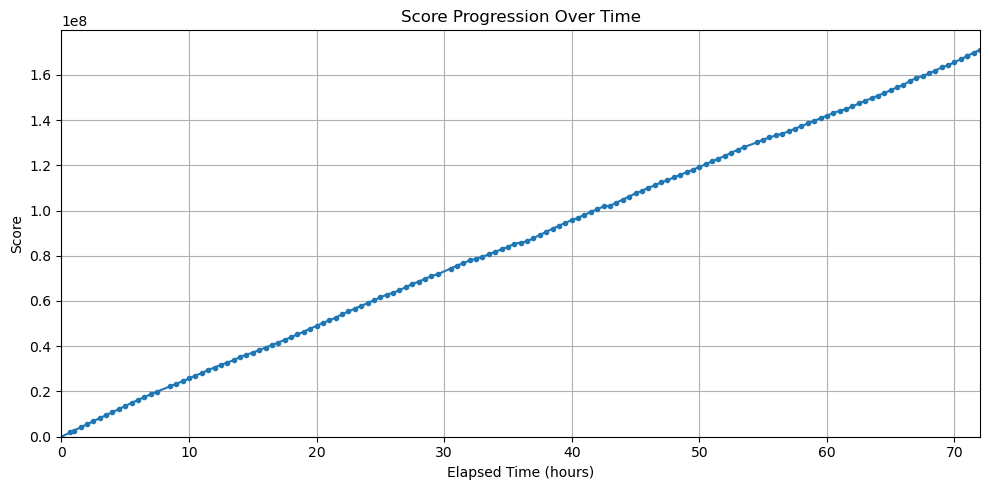

In [159]:
plot_score_timeline(df_border, start, start + timedelta(days=3))

### 方針転換
- ここまで sekai viewer の API を利用してきたが、 WL では総合順位しか記録されていないためあまり参考にならないという問題があった
- そこで、チャプター毎に記録されている BlueSky をスクレイピングしてどうにかする方針に変更
- スクレイピングは重く、また相手方のサーバーに負荷がかかるため notebook の最後にソースコードを記録
- 基本は "recent_posts.csv" を取り扱う方向で行きます。

In [221]:
import re

In [222]:
df = pd.read_csv("recent_posts.csv")

In [223]:
df

,uri,text,created_at,lang
0,NaN,プロセカボーダーのBlueSkyアカウントです。 (https://x.com/pj_sek...,2024-11-01T10:45:13.141Z,NaN
1,NaN,【荊棘の道は何処へ】 10/19 21:00(171.0h経過・終了)時点 Discord...,2024-11-01T11:34:33.559Z,NaN
2,NaN,【荊棘の道は何処へ】 10/19 21:00(171.0h経過・終了)時点 Discord...,2024-11-01T15:07:38.400Z,NaN
3,NaN,【荊棘の道は何処へ】 10/19 21:00(171.0h経過・終了)時点 Discord...,2024-11-01T15:11:02.407Z,NaN
4,NaN,【お知らせ】 本アカウントをご利用いただきありがとうございます 本アカウントは11/25 ...,2024-11-24T19:42:15.688Z,NaN
...,...,...,...,...
7788,NaN,【泡沫に抱かれて】(奏 チャプター) 06/10 13:00(17.0h経過)時点 100...,2025-06-10T04:00:25.743Z,NaN
7789,NaN,【泡沫に抱かれて】(奏 チャプター) 06/10 13:30(17.5h経過)時点 100...,2025-06-10T04:30:26.695Z,NaN
7790,NaN,【泡沫に抱かれて】(奏 チャプター) 06/10 14:00(18.0h経過)時点 100...,2025-06-10T05:00:24.791Z,NaN
7791,NaN,【泡沫に抱かれて】(奏 チャプター) 06/10 14:30(18.5h経過)時点 100...,2025-06-10T05:30:27.407Z,NaN


In [251]:
def parse_row(text: str):
    event_match = re.search(r"【(.+?)】", text)
    event = event_match.group(1) if event_match else None
    date_match = re.search(r"(\d{1,2})/(\d{1,2}) (\d{1,2}):(\d{2})", text)
    if date_match:
        month, day, hour, minute = map(int, date_match.groups())
        year = datetime.now().year  # 年は推測（必要に応じて修正）
        timestamp = datetime(year, month, day, hour, minute).replace(tzinfo=timezone(timedelta(hours=9)))
    else:
        timestamp = None
    rank100_match = re.search(r"100位:\s*([\d,]+)", text)
    rank100score = int(rank100_match.group(1).replace(',', '')) if rank100_match else None
    return pd.Series([event, timestamp, rank100score], index=["event", "timestamp", "rank100score"])

In [252]:
df[["event", "timestamp", "rank100score"]] = df["text"].apply(parse_row)

In [253]:
df = df.dropna(subset=["rank100score"])
df = df.reset_index(drop=True)
df

,uri,text,created_at,lang,event,timestamp,rank100score,character
0,NaN,【Turning Pain into Drive】(冬弥 チャプター) 04/09 00:0...,2025-04-08T15:01:08.086Z,NaN,Turning Pain into Drive,2025-04-09 00:00:00+09:00,9736230,冬弥
1,NaN,【Turning Pain into Drive】(冬弥 チャプター) 04/09 00:3...,2025-04-08T15:30:28.891Z,NaN,Turning Pain into Drive,2025-04-09 00:30:00+09:00,10852690,冬弥
2,NaN,【Turning Pain into Drive】(冬弥 チャプター) 04/09 01:0...,2025-04-08T16:01:04.699Z,NaN,Turning Pain into Drive,2025-04-09 01:00:00+09:00,12044075,冬弥
3,NaN,【Turning Pain into Drive】(冬弥 チャプター) 04/09 01:3...,2025-04-08T16:30:46.300Z,NaN,Turning Pain into Drive,2025-04-09 01:30:00+09:00,13118020,冬弥
4,NaN,【Turning Pain into Drive】(冬弥 チャプター) 04/09 02:0...,2025-04-08T17:01:48.433Z,NaN,Turning Pain into Drive,2025-04-09 02:00:00+09:00,14056515,冬弥
...,...,...,...,...,...,...,...,...
1029,NaN,【泡沫に抱かれて】(奏 チャプター) 06/10 13:00(17.0h経過)時点 100...,2025-06-10T04:00:25.743Z,NaN,泡沫に抱かれて,2025-06-10 13:00:00+09:00,39242957,奏
1030,NaN,【泡沫に抱かれて】(奏 チャプター) 06/10 13:30(17.5h経過)時点 100...,2025-06-10T04:30:26.695Z,NaN,泡沫に抱かれて,2025-06-10 13:30:00+09:00,40469247,奏
1031,NaN,【泡沫に抱かれて】(奏 チャプター) 06/10 14:00(18.0h経過)時点 100...,2025-06-10T05:00:24.791Z,NaN,泡沫に抱かれて,2025-06-10 14:00:00+09:00,41577977,奏
1032,NaN,【泡沫に抱かれて】(奏 チャプター) 06/10 14:30(18.5h経過)時点 100...,2025-06-10T05:30:27.407Z,NaN,泡沫に抱かれて,2025-06-10 14:30:00+09:00,42874062,奏


In [264]:
df_wl = df[df["text"].str.contains("チャプター", na=False)].copy()
def extract_character(text):
    match = re.search(r"\((.+?) チャプター\)", text)
    return match.group(1) if match else None
df_wl["character"] = df_wl["text"].apply(extract_character)

In [265]:
df_wl

,uri,text,created_at,lang,event,timestamp,rank100score,character
0,NaN,【Turning Pain into Drive】(冬弥 チャプター) 04/09 00:0...,2025-04-08T15:01:08.086Z,NaN,Turning Pain into Drive,2025-04-09 00:00:00+09:00,9736230,冬弥
1,NaN,【Turning Pain into Drive】(冬弥 チャプター) 04/09 00:3...,2025-04-08T15:30:28.891Z,NaN,Turning Pain into Drive,2025-04-09 00:30:00+09:00,10852690,冬弥
2,NaN,【Turning Pain into Drive】(冬弥 チャプター) 04/09 01:0...,2025-04-08T16:01:04.699Z,NaN,Turning Pain into Drive,2025-04-09 01:00:00+09:00,12044075,冬弥
3,NaN,【Turning Pain into Drive】(冬弥 チャプター) 04/09 01:3...,2025-04-08T16:30:46.300Z,NaN,Turning Pain into Drive,2025-04-09 01:30:00+09:00,13118020,冬弥
4,NaN,【Turning Pain into Drive】(冬弥 チャプター) 04/09 02:0...,2025-04-08T17:01:48.433Z,NaN,Turning Pain into Drive,2025-04-09 02:00:00+09:00,14056515,冬弥
...,...,...,...,...,...,...,...,...
1029,NaN,【泡沫に抱かれて】(奏 チャプター) 06/10 13:00(17.0h経過)時点 100...,2025-06-10T04:00:25.743Z,NaN,泡沫に抱かれて,2025-06-10 13:00:00+09:00,39242957,奏
1030,NaN,【泡沫に抱かれて】(奏 チャプター) 06/10 13:30(17.5h経過)時点 100...,2025-06-10T04:30:26.695Z,NaN,泡沫に抱かれて,2025-06-10 13:30:00+09:00,40469247,奏
1031,NaN,【泡沫に抱かれて】(奏 チャプター) 06/10 14:00(18.0h経過)時点 100...,2025-06-10T05:00:24.791Z,NaN,泡沫に抱かれて,2025-06-10 14:00:00+09:00,41577977,奏
1032,NaN,【泡沫に抱かれて】(奏 チャプター) 06/10 14:30(18.5h経過)時点 100...,2025-06-10T05:30:27.407Z,NaN,泡沫に抱かれて,2025-06-10 14:30:00+09:00,42874062,奏


In [290]:
def create_df_border(df: pd.DataFrame, start: datetime) -> pd.DataFrame:
    df["elapsed_hours"] = (df["timestamp"] - start).dt.total_seconds() / 3600
    df["delta_times"] = df["timestamp"].diff().dt.total_seconds() / 3600
    df["delta_score"] = df["rank100score"].diff()
    df["score_per_hour"] = df["delta_score"] / df["delta_times"]
    df.loc[df["delta_times"] == 0, "score_per_hour"] = None
    return df

In [315]:
eid_vvbs, start_vvbs, end_vvbs = get_event_info_by_name("Turning Pain into Drive", events)

In [330]:
characters = [
    {"key": "類", "label": "rui", "time": start, "color": "#BB88EE"},
    {"key": "司", "label": "tks", "time": start + timedelta(days=3), "color": "#FFBB00"},
    {"key": "寧々", "label": "nene", "time": start + timedelta(days=6), "color": "#33DD99"},
    {"key": "えむ", "label": "emu", "time": start + timedelta(days=9), "color": "#FF66BB"},
    {"key": "冬弥", "label": "toya", "time": start_vvbs, "color": "#0077DD"},
    {"key": "彰人", "label": "akt", "time": start_vvbs + timedelta(days=3), "color": "#FF7722"},
    {"key": "こはね", "label": "khn", "time": start_vvbs + timedelta(days=6), "color": "#FF6699"},
    {"key": "杏", "label": "ann", "time": start_vvbs + timedelta(days=9), "color": "#00BBDD"}
]

dfs = {
    char["label"]: create_df_border(
        df_wl[df_wl["character"] == char["key"]],
        char["time"]
    )
    for char in characters
}

colors = {
    char["label"]: char["color"]
    for char in characters
}

/var/folders/rr/92_frbjn4msdsp68pmnrhnyh0000gn/T/ipykernel_20502/2948013061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["elapsed_hours"] = (df["timestamp"] - start).dt.total_seconds() / 3600
/var/folders/rr/92_frbjn4msdsp68pmnrhnyh0000gn/T/ipykernel_20502/2948013061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta_times"] = df["timestamp"].diff().dt.total_seconds() / 3600
/var/folders/rr/92_frbjn4msdsp68pmnrhnyh0000gn/T/ipykernel_20502/2948013061.py:4: SettingWithCopyWarning: 
A valu

In [327]:
dfs["akt"]

,uri,text,created_at,lang,event,timestamp,rank100score,character,elapsed_hours,delta_times,delta_score,score_per_hour
115,NaN,【Turning Pain into Drive】(彰人 チャプター) 04/11 20:3...,2025-04-11T11:30:47.906Z,NaN,Turning Pain into Drive,2025-04-11 20:30:00+09:00,1301265,彰人,0.5,NaN,NaN,NaN
116,NaN,【Turning Pain into Drive】(彰人 チャプター) 04/11 21:0...,2025-04-11T12:00:37.150Z,NaN,Turning Pain into Drive,2025-04-11 21:00:00+09:00,2672180,彰人,1.0,0.5,1370915.0,2741830.0
117,NaN,【Turning Pain into Drive】(彰人 チャプター) 04/11 21:3...,2025-04-11T12:30:46.534Z,NaN,Turning Pain into Drive,2025-04-11 21:30:00+09:00,4006730,彰人,1.5,0.5,1334550.0,2669100.0
118,NaN,【Turning Pain into Drive】(彰人 チャプター) 04/11 22:0...,2025-04-11T13:00:44.513Z,NaN,Turning Pain into Drive,2025-04-11 22:00:00+09:00,5290740,彰人,2.0,0.5,1284010.0,2568020.0
119,NaN,【Turning Pain into Drive】(彰人 チャプター) 04/11 22:3...,2025-04-11T13:30:48.290Z,NaN,Turning Pain into Drive,2025-04-11 22:30:00+09:00,6653780,彰人,2.5,0.5,1363040.0,2726080.0
...,...,...,...,...,...,...,...,...,...,...,...,...
247,NaN,【Turning Pain into Drive】(彰人 チャプター) 04/14 17:3...,2025-04-14T08:30:42.755Z,NaN,Turning Pain into Drive,2025-04-14 17:30:00+09:00,157099552,彰人,69.5,0.5,1330875.0,2661750.0
248,NaN,【Turning Pain into Drive】(彰人 チャプター) 04/14 18:0...,2025-04-14T09:01:14.630Z,NaN,Turning Pain into Drive,2025-04-14 18:00:00+09:00,158430742,彰人,70.0,0.5,1331190.0,2662380.0
249,NaN,【Turning Pain into Drive】(彰人 チャプター) 04/14 18:3...,2025-04-14T09:30:48.289Z,NaN,Turning Pain into Drive,2025-04-14 18:30:00+09:00,159904627,彰人,70.5,0.5,1473885.0,2947770.0
250,NaN,【Turning Pain into Drive】(彰人 チャプター) 04/14 19:3...,2025-04-14T10:30:59.345Z,NaN,Turning Pain into Drive,2025-04-14 19:30:00+09:00,162760732,彰人,71.5,1.0,2856105.0,2856105.0


In [328]:
def plot_score_timeline(
    dfs: Dict[str, pd.DataFrame],
    colors: Dict[str, str],
    start: datetime,
    end: datetime
):
    total_hours = (end - start).total_seconds() / 3600
    plt.figure(figsize=(10, 5))

    for label, df in dfs.items():
        plt.plot(
            df["elapsed_hours"], df["rank100score"],
            linestyle='-', marker='.', label=label, color=colors.get(label)
        )
    plt.xlabel("Elapsed Time (hours)")
    plt.ylabel("Score")
    plt.title("Score Progression Over Time")
    plt.grid(True)
    plt.xlim(0, total_hours)
    max_score = max(
        (df["rank100score"].max() for df in dfs.values() if not df["rank100score"].empty),
        default=1
    )
    plt.ylim(0, max_score * 1.05)
    plt.legend()
    plt.tight_layout()
    plt.show()

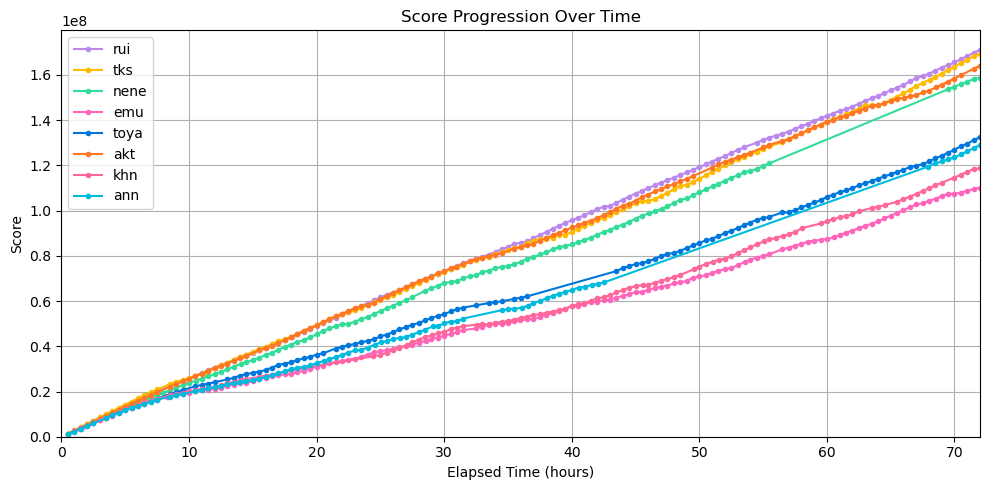

In [332]:
plot_score_timeline(dfs, colors, start, start + timedelta(days=3))

In [190]:
from atproto import Client, models
from atproto_client.models import ids 
from atproto_client.models.app.bsky.feed.post import Record as PostRecord  # ← 追加

In [191]:
def fetch_posts(
    repo: str,
    since: datetime | None = None,
    sleep_sec: float = 0.25,
) -> list[PostRecord]:                         # ← ここを Record に
    client  = Client()
    cursor  = None
    out: list[PostRecord] = []

    while True:
        params = models.ComAtprotoRepoListRecords.Params(
            repo       = repo,
            collection = ids.AppBskyFeedPost,
            limit      = 100,
            reverse    = True,
            cursor     = cursor,
        )
        resp = client.com.atproto.repo.list_records(params)

        for rec in resp.records:
            post = rec.value                # 型: PostRecord
            created = datetime.fromisoformat(
                post.created_at.rstrip("Z")
            ).replace(tzinfo=timezone.utc)

            if since and created < since:
                return out
            out.append(post)

        cursor = resp.cursor
        if not cursor:
            break
        time.sleep(sleep_sec)

    return out

In [192]:
cutoff = datetime(2024, 1, 1, tzinfo=timezone.utc)
recent_posts = fetch_posts("pj-sekai-border.bsky.social", since=cutoff)
print(f"collected {len(recent_posts)} posts")

collected 7793 posts


In [194]:
recent_posts

[Record(created_at='2024-11-01T10:45:13.141Z', text='プロセカボーダーのBlueSkyアカウントです。\n(https://x.com/pj_sekai_border)\n\n[@atproto/api 疎通テスト1]', embed=None, entities=None, facets=None, labels=None, langs=None, reply=None, tags=None, py_type='app.bsky.feed.post'),
 {'text': '【荊棘の道は何処へ】\n10/19 21:00(171.0h経過・終了)時点\n\nDiscord:https://discord.gg/crqW6Q4UjZ\n\n[画像4枚 疎通テスト2]', '$type': 'app.bsky.feed.post', 'embed': {'$type': 'app.bsky.embed.images', 'images': [{'alt': 'プロセカボーダーの画像', '$type': 'app.bsky.embed.image', 'image': {'$type': 'blob', 'ref': {'$link': 'bafkreigb7gdv7opzzbr7yf72elsurcc54n47wfcwf2obzulgjq3iqlynai'}, 'mimeType': 'image/jpeg', 'size': 390648}}, {'alt': 'プロセカボーダーの画像', '$type': 'app.bsky.embed.image', 'image': {'$type': 'blob', 'ref': {'$link': 'bafkreidotacfpkxp4wjeugsl4pblsixu3auvcz4wrpm6g2omzcreym7ou4'}, 'mimeType': 'image/jpeg', 'size': 391351}}, {'alt': 'プロセカボーダーの画像', '$type': 'app.bsky.embed.image', 'image': {'$type': 'blob', 'ref': {'$link': 'bafkreifaa22uodmopr4dumdr3susa

In [198]:
import json as stdjson
from pathlib import Path

In [203]:
import csv
from pathlib import Path

outfile = Path("recent_posts.csv")

fields = ["uri", "text", "created_at", "lang"]

with outfile.open("w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=fields)
    writer.writeheader()
    for p in recent_posts:
        writer.writerow({
            "text":       p.text.replace("\n", " "),       # 改行つぶし
            "created_at": p.created_at,
        })

print(f"saved {outfile}")

saved recent_posts.csv


### よく見たらチャプター単位のランキングも載ってた

以下で取れる

In [57]:
def get_current_chapter_rank(charaId):
    url = f"{BASE_URL}/event/live_chapter_rankings/"
    params = {
        "charaId": charaId,
        "region": REGION
    }
    resp = requests.get(url, params=params)
    print("Status:", resp.status_code)
    print("URL:", resp.url)
    print("Response JSON:", resp.json())

In [58]:
WORLD_BLOOM_JSON_URL = (
    "https://raw.githubusercontent.com/Sekai-World/sekai-master-db-diff/"
    "main/worldBlooms.json"
)
def fetch_world_bloom():
    resp = requests.get(WORLD_BLOOM_JSON_URL)
    resp.raise_for_status()
    data = resp.json()
    if not isinstance(data, list):
        raise ValueError("events.json の中身がリストではありません。")
    return data

In [59]:
data = fetch_world_bloom()
data[len(data) - 1]

{'id': 17604,
 'eventId': 176,
 'gameCharacterId': 8,
 'chapterNo': 4,
 'chapterStartAt': 1755428400000,
 'aggregateAt': 1755687599000,
 'chapterEndAt': 1755688199000,
 'costume2dId': 394,
 'isSupplemental': False}

In [60]:
get_current_chapter_rank(7)

Status: 200
URL: https://api.sekai.best/event/live_chapter_rankings/?charaId=7&region=jp
Response JSON: {'status': 'success', 'data': {'eventRankings': [{'id': 5028329, 'eventId': 176, 'timestamp': '2025-08-17T11:12:00.099Z', 'rank': 47, 'score': 150000319, 'userId': '96082934628372484', 'userName': '△○×□', 'userCard': {'level': 60, 'cardId': 1219, 'masterRank': 5, 'defaultImage': 'special_training', 'specialTrainingStatus': 'done'}, 'userProfile': {'word': '一旦せめよんﾏ??', 'userId': '96082934628372484', 'twitterId': 'prsktagnanato', 'profileImageType': 'leader'}, 'userCheerfulCarnival': {}, 'userProfileHonors': [{'seq': 1, 'honorId': 1070901, 'honorLevel': 5, 'bondsHonorWordId': 1070903, 'profileHonorType': 'bonds', 'bondsHonorViewType': 'normal'}]}, {'id': 5028283, 'eventId': 176, 'timestamp': '2025-08-17T11:12:00.099Z', 'rank': 1, 'score': 237319320, 'userId': '5205915209191430', 'userName': 'つぐみかん♡', 'userCard': {'level': 60, 'cardId': 1220, 'masterRank': 5, 'defaultImage': 'original',

In [65]:
url = f"{BASE_URL}/event/176/chapter_rankings/time"
params = {
    "charaId": 8,
    "region": REGION
}
resp = requests.get(url, params=params)
print("Status:", resp.status_code)
print("URL:", resp.url)
print("Response JSON:", resp.json())

Status: 200
URL: https://api.sekai.best/event/176/chapter_rankings/time?charaId=8&region=jp
Response JSON: {'status': 'success', 'data': ['2025-08-17T11:00:00.121Z', '2025-08-17T11:00:00.121Z', '2025-08-17T11:30:00.093Z', '2025-08-17T12:00:00.156Z', '2025-08-17T12:30:00.138Z', '2025-08-17T13:00:00.174Z', '2025-08-17T13:30:00.251Z', '2025-08-17T14:00:00.264Z', '2025-08-17T14:30:00.207Z', '2025-08-17T15:00:00.178Z', '2025-08-17T15:30:00.216Z', '2025-08-17T16:00:00.249Z', '2025-08-17T16:30:00.102Z', '2025-08-17T17:00:00.140Z', '2025-08-17T17:30:00.199Z', '2025-08-17T18:00:00.147Z', '2025-08-17T18:30:00.196Z', '2025-08-17T19:30:00.162Z', '2025-08-17T20:00:00.111Z', '2025-08-17T20:30:00.099Z', '2025-08-17T21:00:00.104Z', '2025-08-17T21:30:00.127Z', '2025-08-17T22:00:00.099Z', '2025-08-17T22:30:00.114Z', '2025-08-17T23:00:00.131Z', '2025-08-17T23:30:00.103Z', '2025-08-18T00:00:00.197Z', '2025-08-18T00:30:00.193Z', '2025-08-18T01:00:00.141Z', '2025-08-18T01:30:00.103Z', '2025-08-18T02:00:00.0

In [66]:
url = f"{BASE_URL}/event/175/rankings/time"
params = {
    "region": REGION
}
resp = requests.get(url, params=params)
print("Status:", resp.status_code)
print("URL:", resp.url)
print("Response JSON:", resp.json())

Status: 200
URL: https://api.sekai.best/event/175/rankings/time?region=jp
Response JSON: {'status': 'success', 'data': ['2025-07-31T06:12:00.111Z', '2025-07-31T06:30:00.097Z', '2025-07-31T07:00:00.108Z', '2025-07-31T07:30:00.189Z', '2025-07-31T08:00:00.150Z', '2025-07-31T08:30:00.154Z', '2025-07-31T09:00:00.110Z', '2025-07-31T09:30:00.099Z', '2025-07-31T10:00:00.282Z', '2025-07-31T10:30:00.113Z', '2025-07-31T11:00:00.189Z', '2025-07-31T11:30:00.142Z', '2025-07-31T12:00:00.125Z', '2025-07-31T12:30:00.109Z', '2025-07-31T13:00:00.109Z', '2025-07-31T13:30:00.188Z', '2025-07-31T14:00:00.168Z', '2025-07-31T14:30:00.140Z', '2025-07-31T15:00:00.136Z', '2025-07-31T15:30:00.456Z', '2025-07-31T16:00:00.220Z', '2025-07-31T16:30:00.232Z', '2025-07-31T17:00:00.109Z', '2025-07-31T17:30:00.137Z', '2025-07-31T18:00:00.279Z', '2025-07-31T18:30:00.114Z', '2025-07-31T19:00:00.413Z', '2025-07-31T19:30:00.125Z', '2025-07-31T20:00:00.107Z', '2025-07-31T20:30:00.154Z', '2025-07-31T21:00:00.104Z', '2025-07-31T

In [1]:
/event/{eventId}/chapter_rankings/graph

ModuleNotFoundError: No module named 'gspread'